In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the raw dataset
df = pd.read_csv('medical_appointments.csv')

# Peek at first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Basic info about dataset
df.info()

# Descriptive statistics for numeric + categorical
df.describe(include='all')

# Missing values count
df.isnull().sum().sort_values(ascending=False)

# Number of duplicate rows
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


np.int64(0)

In [7]:
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(" ", "_")
                .str.replace("-", "_"))
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
# Convert to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce')
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce')

# Create wait_days
df['wait_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Drop rows with invalid negative wait times
df = df[df['wait_days'] >= 0]

In [9]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[df['age'] < 0, 'age'] = np.nan
df.loc[df['age'] > 120, 'age'] = np.nan

In [10]:
df['gender'] = df['gender'].astype(str).str.upper().str.strip()
df.loc[~df['gender'].isin(['M', 'F']), 'gender'] = np.nan

In [11]:
df['no_show'] = df['no_show'].astype(str).str.strip().str.lower()
df['no_show'] = df['no_show'].replace({
    'no': 0, 'yes': 1,
    'n': 0, 'y': 1,
    '0': 0, '1': 1,
    'false': 0, 'true': 1
}).astype('Int64')

/tmp/ipython-input-4062136339.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['no_show'] = df['no_show'].replace({


In [12]:
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if set(map(str, unique_vals)).issubset({'0', '1'}):
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

In [13]:
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())  # numeric -> median
        else:
            df[col] = df[col].fillna(df[col].mode()[0])  # categorical -> mode

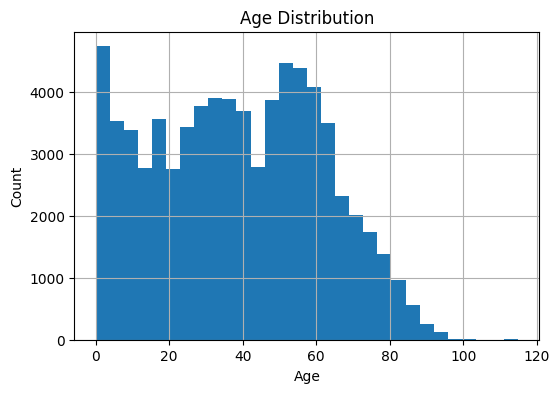

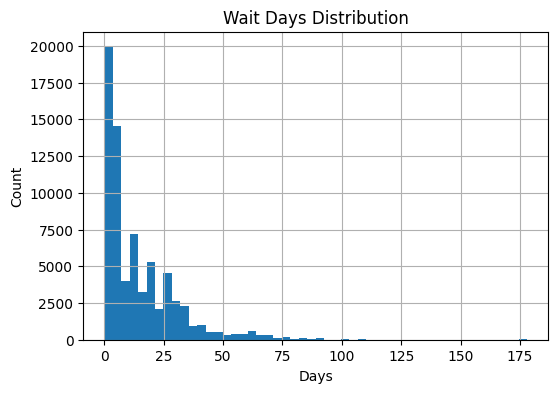

In [14]:
# Age distribution
df['age'].hist(bins=30, figsize=(6,4))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Wait days distribution
df['wait_days'].dropna().hist(bins=50, figsize=(6,4))
plt.title('Wait Days Distribution')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [16]:
# Before stats
raw_df = pd.read_csv('medical_appointments.csv')
before_shape = raw_df.shape
before_nulls = raw_df.isnull().sum().sum()
before_dupes = raw_df.duplicated().sum()

# After stats
after_shape = df.shape
after_nulls = df.isnull().sum().sum()
after_dupes = df.duplicated().sum()

print("Rows before:", before_shape[0], "| after:", after_shape[0])
print("Cols before:", before_shape[1], "| after:", after_shape[1])
print("Missing values before:", before_nulls, "| after:", after_nulls)
print("Duplicates before:", before_dupes, "| after:", after_dupes)

Rows before: 110527 | after: 71959
Cols before: 14 | after: 15
Missing values before: 0 | after: 0
Duplicates before: 0 | after: 0
